## 损失函数

### 损失函数的底层实现与改写方法

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np

In [7]:
class _Loss(nn.Module):
    def __init__(self, reduction='mean'):
        super(_Loss, self).__init__()
        if reduction is not None:
            pass
        else:
            pass

    nn.CrossEntropyloss(weight=None,size_average=None,ignore_index=-100,reduce=None,reduction='mean')

- 功能

    交叉熵计算 包含了SoftMax计算
    
- weight

    各类别的loss设置权值

- ignore_index

    忽略某个类别

- reduction

   计算模式：None/sum/mean 
   - None 逐个元素计算
   - sum  所有元素求和，返回标量
   - mean 加权平均
   
- 计算公式

    $$loss(x,class)=weight[class]*(-x[class]+log{\sum_jexp(x[j])})$$

In [8]:
# fake data  inputs为未归一化的输出向量
inputs = torch.tensor([[1, 2], [1, 3], [1, 3]], dtype=torch.float)
target = torch.tensor([0, 1, 1], dtype=torch.long)

In [4]:
'''
公式实现nn.CrossEntropyloss()
'''

idx = 0

input_1 = inputs.detach().numpy()[idx]  # [1, 2]
print(input_1)
print(inputs.numpy())
target_1 = target.numpy()[idx]  # [0]

# 第一项
x_class = input_1[target_1]

# 第二项
sigma_exp_x = np.sum(list(map(np.exp, input_1)))
#map(np.exp, input_1)  对input_1的每个元素计算exp()函数
log_sigma_exp_x = np.log(sigma_exp_x)

# 输出loss
loss_1 = -x_class + log_sigma_exp_x

print("第一个样本loss为: ", loss_1)

[1. 2.]
[[1. 2.]
 [1. 3.]
 [1. 3.]]
第一个样本loss为:  1.3132617


In [5]:
# ----------------------------------- CrossEntropy loss: reduction -----------------------------------

# def loss function
loss_f_none = nn.CrossEntropyLoss(weight=None, reduction='none')  ##返回向量 分别计算每个样本的损失
loss_f_sum = nn.CrossEntropyLoss(weight=None, reduction='sum')  ##返回损失和 计算所有样本损失和
loss_f_mean = nn.CrossEntropyLoss(weight=None, reduction='mean')  ##返回损失均值  计算所有样本的损失均值

# forward
loss_none = loss_f_none(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)

# view
print("Cross Entropy Loss:\n ", loss_none, loss_sum, loss_mean)

Cross Entropy Loss:
  tensor([1.3133, 0.1269, 0.1269]) tensor(1.5671) tensor(0.5224)


In [6]:
# ----------------------------------- weight -----------------------------------

# def loss function
weights = torch.tensor([1, 2], dtype=torch.float)  #0类别损失乘以1,1类别损失乘以2
# weights = torch.tensor([0.7, 0.3], dtype=torch.float)

loss_f_none_w = nn.CrossEntropyLoss(weight=weights, reduction='none')
loss_f_sum = nn.CrossEntropyLoss(weight=weights, reduction='sum')
loss_f_mean = nn.CrossEntropyLoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)

# view
print("\nweights: ", weights)
print(loss_none_w, loss_sum, loss_mean)


weights:  tensor([1., 2.])
tensor([1.3133, 0.2539, 0.2539]) tensor(1.8210) tensor(0.3642)


In [8]:
# --------------------------------- compute by hand

# flag = 1
weights = torch.tensor([1, 2], dtype=torch.float)
weights_all = np.sum(list(map(lambda x: weights.numpy()[x], target.numpy())))  # [0, 1, 1]  # [1 2 2]

mean = 0
loss_sep = loss_none.detach().numpy()
for i in range(target.shape[0]):

    x_class = target.numpy()[i]
    tmp = loss_sep[i] * (weights.numpy()[x_class] / weights_all)
    mean += tmp

print(mean)

0.3641947731375694


    nn.NLLLoss(weight=None,ignore_index=-100,reduction='mean')

- 功能

    实现负对数似然的负号功能
    
- weight

    各类别的loss设置权值

- ignore_index

    忽略某个类别

- reduction

   计算模式：None/sum/mean 
   - None 逐个元素计算
   - sum  所有元素求和，返回标量
   - mean 加权平均

In [9]:
# ----------------------------------- 2 NLLLoss -----------------------------------

weights = torch.tensor([1, 1], dtype=torch.float)

loss_f_none_w = nn.NLLLoss(weight=weights, reduction='none')
loss_f_sum = nn.NLLLoss(weight=weights, reduction='sum')
loss_f_mean = nn.NLLLoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target)
loss_sum = loss_f_sum(inputs, target)
loss_mean = loss_f_mean(inputs, target)

# view
print("\nweights: ", weights)
print("NLL Loss", loss_none_w, loss_sum, loss_mean)


weights:  tensor([1., 1.])
NLL Loss tensor([-1., -3., -3.]) tensor(-7.) tensor(-2.3333)


    nn.BCELoss(weight=None,reduction='mean')

- 功能

    二分类交叉熵
    
- 计算公式

    $$l_n=-w_n*(y_n*log(x_n)+(1-y_n)*log(1-x_n))$$

In [12]:
'''
函数实现
'''

inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

idx = 0

x_i = inputs.detach().numpy()[idx, idx]
y_i = target.numpy()[idx, idx]              #

# loss
# l_i = -[ y_i * np.log(x_i) + (1-y_i) * np.log(1-y_i) ]      # np.log(0) = nan
l_i = -y_i * np.log(x_i) if y_i else -(1-y_i) * np.log(1-x_i)

# 输出loss
print("BCE inputs: ", inputs)
print("第一个loss为: ", l_i)

BCE inputs:  tensor([[1., 2.],
        [2., 2.],
        [3., 4.],
        [4., 5.]])
第一个loss为:  -0.0


In [11]:
inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

target_bce = target

# itarget
inputs = torch.sigmoid(inputs)  ##输入值在0-1之间

weights = torch.tensor([1, 1], dtype=torch.float)

loss_f_none_w = nn.BCELoss(weight=weights, reduction='none')
loss_f_sum = nn.BCELoss(weight=weights, reduction='sum')
loss_f_mean = nn.BCELoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)

# view
print("\nweights: ", weights)
print("BCE Loss", loss_none_w, loss_sum, loss_mean)


weights:  tensor([1., 1.])
BCE Loss tensor([[0.3133, 2.1269],
        [0.1269, 2.1269],
        [3.0486, 0.0181],
        [4.0181, 0.0067]]) tensor(11.7856) tensor(1.4732)


    nn.BCEWithLogitsLoss(self, weight=None, reduction='mean', pos_weight=None)

- 功能

    结合sigmoid函数与二分类的交叉熵

- pos_weight

    正样本的权值
    
- weight

    各类别的loss设置权值

- ignore_index

    忽略某个类别

- reduction

   计算模式：None/sum/mean 
   - None 逐个元素计算
   - sum  所有元素求和，返回标量
   - mean 加权平均
   
- 计算公式

     $$l_n=-w_n*(y_n*log(\sigma(x_n))+(1-y_n)*log(1-\sigma(x_n)))$$

In [13]:
# ----------------------------------- 4 BCE with Logis Loss -----------------------------------

inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

target_bce = target

# inputs = torch.sigmoid(inputs)  调用BCEWithLogitsLoss()函数不需要再添加Sigmoid函数

weights = torch.tensor([1, 1], dtype=torch.float)

loss_f_none_w = nn.BCEWithLogitsLoss(weight=weights, reduction='none')
loss_f_sum = nn.BCEWithLogitsLoss(weight=weights, reduction='sum')
loss_f_mean = nn.BCEWithLogitsLoss(weight=weights, reduction='mean')

# forward
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)

# view
print("\nweights: ", weights)
print(loss_none_w, loss_sum, loss_mean)


weights:  tensor([1., 1.])
tensor([[0.3133, 2.1269],
        [0.1269, 2.1269],
        [3.0486, 0.0181],
        [4.0181, 0.0067]]) tensor(11.7856) tensor(1.4732)


In [14]:
# --------------------------------- pos weight

inputs = torch.tensor([[1, 2], [2, 2], [3, 4], [4, 5]], dtype=torch.float)
target = torch.tensor([[1, 0], [1, 0], [0, 1], [0, 1]], dtype=torch.float)

target_bce = target

# itarget
# inputs = torch.sigmoid(inputs)

weights = torch.tensor([1], dtype=torch.float)
pos_w = torch.tensor([3], dtype=torch.float)  # 3

loss_f_none_w = nn.BCEWithLogitsLoss(weight=weights,
                                     reduction='none',
                                     pos_weight=pos_w)
loss_f_sum = nn.BCEWithLogitsLoss(weight=weights,
                                  reduction='sum',
                                  pos_weight=pos_w)
loss_f_mean = nn.BCEWithLogitsLoss(weight=weights,
                                   reduction='mean',
                                   pos_weight=pos_w)

# forward
loss_none_w = loss_f_none_w(inputs, target_bce)
loss_sum = loss_f_sum(inputs, target_bce)
loss_mean = loss_f_mean(inputs, target_bce)

# view
print("\npos_weights: ", pos_w)
print(loss_none_w, loss_sum, loss_mean)


pos_weights:  tensor([3.])
tensor([[0.9398, 2.1269],
        [0.3808, 2.1269],
        [3.0486, 0.0544],
        [4.0181, 0.0201]]) tensor(12.7158) tensor(1.5895)


    torch.nn.L1Loss(reduction='mean')

- 计算公式：

    $$l_n=|x_n-y_n|$$

In [15]:
# ------------------------------------------------- 5 L1 loss ----------------------------------------------

inputs = torch.ones((2, 2))
target = torch.ones((2, 2)) * 3

loss_f = nn.L1Loss(reduction='none')
loss = loss_f(inputs, target)

print("input:{}\ntarget:{}\nL1 loss:{}".format(inputs, target, loss))

input:tensor([[1., 1.],
        [1., 1.]])
target:tensor([[3., 3.],
        [3., 3.]])
L1 loss:tensor([[2., 2.],
        [2., 2.]])


    torch.nn.MSELoss(reduction='mean')

- 计算公式

    $$l_n=(x_n-y_n)^2$$

In [16]:
# ------------------------------------------------- 6 MSE loss ----------------------------------------------

loss_f_mse = nn.MSELoss(reduction='none')
loss_mse = loss_f_mse(inputs, target)

print("MSE loss:{}".format(loss_mse))

MSE loss:tensor([[4., 4.],
        [4., 4.]])


    torch.nn.SmoothL1Loss(reduction='mean')

- 计算公式

    $$
z_i=
\begin{cases}
0.5*(x_i-y_i)^2, &if\ |x_i-y_i|<1\\
|x_i-y_i|-0.5, &otherwise
\end{cases}
$$

$$loss(x,y)=\frac 1n\sum_i{z_i}$$

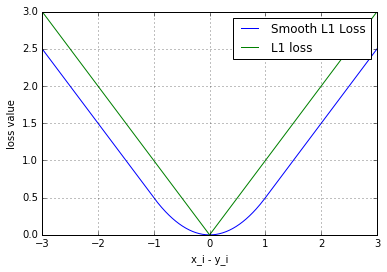

In [19]:
# ------------------------------------------------- 7 Smooth L1 loss ----------------------------------------------
%matplotlib inline
from matplotlib import pyplot as plt

inputs = torch.linspace(-3, 3, steps=500)
target = torch.zeros_like(inputs)

loss_f = nn.SmoothL1Loss(reduction='none')

loss_smooth = loss_f(inputs, target)

loss_l1 = np.abs(inputs.numpy())

plt.plot(inputs.numpy(), loss_smooth.numpy(), label='Smooth L1 Loss')
plt.plot(inputs.numpy(), loss_l1, label='L1 loss')
plt.xlabel('x_i - y_i')
plt.ylabel('loss value')
plt.legend()
plt.grid()
plt.show()

    torch.nn.PoissonNLLLoss(log_input=True, full=False,  eps=1e-08,  reduction='mean')
- 功能

    泊松分布的负对数似然损失函数

- log_input

    输入是否为对数形式
    
- full
    
    计算所有loss，一般不改变

- eps

    防止log为NAN

- 计算公式

    log_input=True:
    
    $loss(input,target)=exp(input) - target * input$ 
    
    log_input=False:
    
    $loss(input,target)=input - target * log(input+eps)$

In [21]:
# ------------------------------------------------- 8 Poisson NLL Loss ----------------------------------------------

inputs = torch.randn((2, 2))
target = torch.randn((2, 2))

##手动实现
idx = 0

loss_1 = torch.exp(inputs[idx, idx]) - target[idx, idx] * inputs[idx, idx]

print("第一个元素loss:", loss_1)

##pytorch框架实现
loss_f = nn.PoissonNLLLoss(log_input=True, full=False, reduction='none')
loss = loss_f(inputs, target)
print("input:{}\ntarget:{}\nPoisson NLL loss:{}".format(inputs, target, loss))

第一个元素loss: tensor(-0.1584)
input:tensor([[-1.5419, -1.2423],
        [-0.3392, -1.5404]])
target:tensor([[-0.2415,  1.2992],
        [-0.3380,  0.6951]])
Poisson NLL loss:tensor([[-0.1584,  1.9027],
        [ 0.5977,  1.2850]])


    torch.nn.KLDivLoss(reduction='mean')

- 功能

    计算 input 和 target 之间的 KL 散度
    
- 计算公式

    需要要提前对输入取nn.logsoftmax($x_n$)
    
    $$l_n=y_n*(logy_n-x_n)$$

- reduction

    注意reduction中的batchmean，表示以batchsize为总量求取均值

In [23]:
# ------------------------------------------------- 9 KL Divergence Loss ----------------

inputs = torch.tensor([[0.5, 0.3, 0.2], [0.2, 0.3, 0.5]])
inputs_log = torch.log(inputs)  ##log输入
target = torch.tensor([[0.9, 0.05, 0.05], [0.1, 0.7, 0.2]], dtype=torch.float)

#手动实现
idx = 0
loss_1 = target[idx, idx] * (torch.log(target[idx, idx]) - inputs[idx, idx])
print("第一个元素loss:", loss_1)

#pytorch框架
loss_f_none = nn.KLDivLoss(reduction='none')
loss_f_mean = nn.KLDivLoss(reduction='mean')
loss_f_bs_mean = nn.KLDivLoss(reduction='batchmean')

loss_none = loss_f_none(inputs, target)
loss_mean = loss_f_mean(inputs, target)
loss_bs_mean = loss_f_bs_mean(inputs, target)

print("loss_none:\n{}\nloss_mean:\n{}\nloss_bs_mean:\n{}".format(
    loss_none, loss_mean, loss_bs_mean))

第一个元素loss: tensor(-0.5448)
loss_none:
tensor([[-0.5448, -0.1648, -0.1598],
        [-0.2503, -0.4597, -0.4219]])
loss_mean:
-0.3335360288619995
loss_bs_mean:
-1.0006080865859985


C:\Anaconda3\lib\site-packages\torch\nn\functional.py:1932: UserWarning: reduction: 'mean' divides the total loss by both the batch size and the support size.'batchmean' divides only by the batch size, and aligns with the KL div math definition.'mean' will be changed to behave the same as 'batchmean' in the next major release.
  warnings.warn("reduction: 'mean' divides the total loss by both the batch size and the support size."


    torch.nn.MarginRankingLoss(margin=0.0, reduction='mean')
 
- 功能

    比较两个向量的相似度，然后进行排序

- margin

    边界值，x1和x2的差异值
    
- 计算公式

    $$loss(x,y)=max(0,-y*(x_1-x_2)+margin)$$
    
    - 公式分析：
    - y=1时，希望$x_1$比$x_2$大，$x_1>x_2$,loss为0
    - y=-1时，希望$x_1$比$x_2$小，$x_1<x_2$,loss为0


In [24]:
# ---------------------------------------------- 10 Margin Ranking Loss -----------------------------------------

x1 = torch.tensor([[1], [2], [3]], dtype=torch.float)
x2 = torch.tensor([[2], [2], [2]], dtype=torch.float)

target = torch.tensor([1, 1, -1], dtype=torch.float)

loss_f_none = nn.MarginRankingLoss(margin=0, reduction='none')

loss = loss_f_none(x1, x2, target)

print(loss)

tensor([[1., 1., 0.],
        [0., 0., 0.],
        [0., 0., 1.]])


    torch.nn.MultiLabelMarginLoss(reduction='mean')

- 功能

    多标签边界损失函数
    
- 计算公式

    $$loss(x,y)=\sum{_i}{_j}\frac {max(0,1-(x[y[j]]-x[i]))}{x.size(0)}$$

In [28]:
# ---------------------------------------------- 11 Multi Label Margin Loss ---------------------

x = torch.tensor([[0.1, 0.2, 0.4, 0.8]])
y = torch.tensor([[0, 3, -1, -1]], dtype=torch.long)

##pytorch框架
loss_f = nn.MultiLabelMarginLoss(reduction='none')
loss = loss_f(x, y)
print(loss)


##公式实现

x = x[0]
print(x)
item_1 = (1 - (x[0] - x[1])) + (1 - (x[0] - x[2]))  # [0]
item_2 = (1 - (x[3] - x[1])) + (1 - (x[3] - x[2]))  # [3]
loss_h = (item_1 + item_2) / x.shape[0]
print(loss_h)

tensor([0.8500])
tensor([0.1000, 0.2000, 0.4000, 0.8000])
tensor(0.8500)


    torch.nn.SoftMarginLoss(reduction='mean')

- 功能
    
    计算二分类的逻辑斯特损失
    
- 计算公式

    $$loss(x,y)=\sum_i \frac {log(1+exp(-y[i]*x[i])}{x.nelement()})$$

In [30]:
# ---------------------------------------------- 12 SoftMargin Loss -----------------------------------------

inputs = torch.tensor([[0.3, 0.7], [0.5, 0.5]])
target = torch.tensor([[-1, 1], [1, -1]], dtype=torch.float)


#手动实现
idx = 0
inputs_i = inputs[idx, idx]
target_i = target[idx, idx]
loss_h = np.log(1 + np.exp(-target_i * inputs_i))
print(loss_h)

##pytorch框架
loss_f = nn.SoftMarginLoss(reduction='none')
loss = loss_f(inputs, target)
print("SoftMargin: ", loss)


tensor(0.8544)
SoftMargin:  tensor([[0.8544, 0.4032],
        [0.4741, 0.9741]])


    torch.nn.MultiLabelSoftMarginLoss(weight=None, reduction='mean')
    
- 功能

    SoftMarginLoss的多标签版本

- 计算公式

    $$loss(x,y)=-\frac 1C \sum_i y[i]*log(1+exp(-x[i])^-1)+(1-y[i])*log(\frac {exp(-x[i])}{1+exp(-x[i])})$$

In [33]:
# ---------------------------------------------- 13 MultiLabel SoftMargin Loss ---------------------------------

##手动实现
inputs = torch.tensor([[0.3, 0.7, 0.8]])
target = torch.tensor([[0, 1, 1]], dtype=torch.float)

i_0 = torch.log(torch.exp(-inputs[0, 0]) / (1 + torch.exp(-inputs[0, 0])))
i_1 = torch.log(1 / (1 + torch.exp(-inputs[0, 1])))
i_2 = torch.log(1 / (1 + torch.exp(-inputs[0, 2])))
loss_h = (i_0 + i_1 + i_2) / -3
print(loss_h)

#pytorch 框架
loss_f = nn.MultiLabelSoftMarginLoss(reduction='none')
loss = loss_f(inputs, target)
print("MultiLabel SoftMargin: ", loss)

tensor(0.5429)
MultiLabel SoftMargin:  tensor([0.5429])


    torch.nn.MultiMarginLoss(p=1, margin=1.0, weight=None,  reduction='mean')

- 功能

    计算多分类的合页损失

- 计算公式

    $$loss(x,y)=\frac {\sum_i max(0,w[y]*(margin-x[y]+x[i])^p)}{x.size(0)}$$

In [34]:
# ---------------------------------------------- 14 Multi Margin Loss -----------------------------------------

x = torch.tensor([[0.1, 0.2, 0.7], [0.2, 0.5, 0.3]])
y = torch.tensor([1, 2], dtype=torch.long)

loss_f = nn.MultiMarginLoss(reduction='none')

loss = loss_f(x, y)

print("Multi Margin Loss: ", loss)

# --------------------------------- 手动计算

x = x[0]
margin = 1
i_0 = margin - (x[1] - x[0])
# i_1 = margin - (x[1] - x[1])
i_2 = margin - (x[1] - x[2])

loss_h = (i_0 + i_2) / x.shape[0]

print(loss_h)

Multi Margin Loss:  tensor([0.8000, 0.7000])
tensor(0.8000)


    torch.nn.TripletMarginLoss(margin=1.0, p=2.0, eps=1e-06, swap=False, reduction='mean')

- 功能

    计算三元组损失，常用于人脸验证

- 计算公式

    $$L(a,p,n)=max\{d(a_i,p_i)-d(a_i,n_i)+margin,0\}$$
    
    $$d(x_i,y_i)=|x_i-y_i|_p$$
    
![](./img/trip.png)

In [35]:
# ---------------------------------------------- 15 Triplet Margin Loss -----------------------------------------

anchor = torch.tensor([[1.]])
pos = torch.tensor([[2.]])
neg = torch.tensor([[0.5]])

loss_f = nn.TripletMarginLoss(margin=1.0, p=1)

loss = loss_f(anchor, pos, neg)

print("Triplet Margin Loss", loss)

# --------------------------------- compute by hand
margin = 1
a, p, n = anchor[0], pos[0], neg[0]

d_ap = torch.abs(a-p)
d_an = torch.abs(a-n)
loss = d_ap - d_an + margin
print(loss)

Triplet Margin Loss tensor(1.5000)
tensor([1.5000])


    torch.nn.HingeEmbeddingLoss(margin=1.0,  reduction='mean')

- 功能
    
    计算两个输入的相似性，常用语非线性embedding和半监督学习
    
    注意：
    输入x为两个输入之差的绝对值
    
$$
l_n=
\begin{cases}
x_n, &if\ y_n = 1\\
max(0,margin-x_n), &if\  y_n = -1
\end{cases}
$$
    


In [36]:
# ---------------------------------------------- 16 Hinge Embedding Loss -----------------------------------------

inputs = torch.tensor([[1., 0.8, 0.5]])
target = torch.tensor([[1, 1, -1]])

loss_f = nn.HingeEmbeddingLoss(margin=1, reduction='none')

loss = loss_f(inputs, target)

print("Hinge Embedding Loss", loss)

# --------------------------------- compute by hand

margin = 1.
loss = max(0, margin - inputs.numpy()[0, 2])
print(loss)

Hinge Embedding Loss tensor([[1.0000, 0.8000, 0.5000]])
0.5


    torch.nn.CosineEmbeddingLoss(margin=0.0, reduction='mean')

- 功能

    采用余弦相似度计算两个输入的相似性

- 计算公式

    $$
loss(x,y)=
\begin{cases}
1-cos(x_1,x_2), &if\ y = 1\\
max(0,cos(x_1,x_2)-margin), &if\  y = -1
\end{cases}
$$
    

In [37]:
# ---------------------------------------------- 17 Cosine Embedding Loss -----------------------------------------

x1 = torch.tensor([[0.3, 0.5, 0.7], [0.3, 0.5, 0.7]])
x2 = torch.tensor([[0.1, 0.3, 0.5], [0.1, 0.3, 0.5]])

target = torch.tensor([[1, -1]], dtype=torch.float)

loss_f = nn.CosineEmbeddingLoss(margin=0., reduction='none')

loss = loss_f(x1, x2, target)

print("Cosine Embedding Loss", loss)

# --------------------------------- compute by hand

margin = 0.

def cosine(a, b):
    numerator = torch.dot(a, b)
    denominator = torch.norm(a, 2) * torch.norm(b, 2)
    return float(numerator/denominator)

l_1 = 1 - (cosine(x1[0], x2[0]))

l_2 = max(0, cosine(x1[0], x2[0]))
print(l_1, l_2)

Cosine Embedding Loss tensor([[0.0167, 0.9833]])
0.016662120819091797 0.9833378791809082


    torch.nn.CTCLoss(blank=0, reduction='mean',zero_infinity=False)

- 功能

    解决时序数据的分类
    
- blank

    标签

- zero_infinity

    无穷大的值或梯度置为0

In [38]:
# ---------------------------------------------- 18 CTC Loss -----------------------------------------

T = 50      # Input sequence length
C = 20      # Number of classes (including blank)
N = 16      # Batch size
S = 30      # Target sequence length of longest target in batch
S_min = 10  # Minimum target length, for demonstration purposes

# Initialize random batch of input vectors, for *size = (T,N,C)
inputs = torch.randn(T, N, C).log_softmax(2).detach().requires_grad_()

# Initialize random batch of targets (0 = blank, 1:C = classes)
target = torch.randint(low=1, high=C, size=(N, S), dtype=torch.long)

input_lengths = torch.full(size=(N,), fill_value=T, dtype=torch.long)
target_lengths = torch.randint(low=S_min, high=S, size=(N,), dtype=torch.long)

ctc_loss = nn.CTCLoss()
loss = ctc_loss(inputs, target, input_lengths, target_lengths)

print("CTC loss: ", loss)

CTC loss:  tensor(6.6590, grad_fn=<MeanBackward0>)
